# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
import tensorflow as tf
import pathlib
from tensorflow.keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix

# Importing test set directory

In [2]:
dataset_test_dir = 'C:\\Users\\poya system\\Desktop\\Rice_Image_Dataset_Deep_Learning_Project\\test'
dataset_test_dir = pathlib.Path(dataset_test_dir)
dataset_test_dir

WindowsPath('C:/Users/poya system/Desktop/Rice_Image_Dataset_Deep_Learning_Project/test')

In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
test_set = test_datagen.flow_from_directory(dataset_test_dir,target_size=(224,224),batch_size=32,shuffle=False)

Found 7500 images belonging to 5 classes.


In [5]:
test_set.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

# loading simple model to predict test set values

In [6]:
simple_model = load_model('RiceImageSimpleModel1.h5')

In [7]:
test_steps_per_epoch = np.math.ceil(test_set.samples/test_set.batch_size)

In [8]:
print(test_steps_per_epoch)

235


In [9]:
prediction = simple_model.predict(test_set,steps=test_steps_per_epoch)

235/235 [==============================] - 129s 549ms/step


In [10]:
predicted_classes = np.argmax(prediction,axis = 1)

In [11]:
print(predicted_classes)

[0 0 0 ... 4 4 4]


In [12]:
real_classes = test_set.classes

In [13]:
real_classes

array([0, 0, 0, ..., 4, 4, 4])

In [14]:
pd.DataFrame(predicted_classes)[0].unique()

array([0, 3, 4, 1, 2], dtype=int64)

In [15]:
class_labels = list(test_set.class_indices.keys())

In [16]:
class_labels

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

# Simple model evaluation

In [17]:
simple_model_report = classification_report(real_classes,predicted_classes,target_names=class_labels)

In [18]:
print(simple_model_report)

              precision    recall  f1-score   support

     Arborio       0.95      0.99      0.97      1500
     Basmati       0.81      0.98      0.89      1500
      Ipsala       0.94      1.00      0.97      1500
     Jasmine       0.97      0.69      0.81      1500
   Karacadag       0.99      0.95      0.97      1500

    accuracy                           0.92      7500
   macro avg       0.93      0.92      0.92      7500
weighted avg       0.93      0.92      0.92      7500



In [19]:
cm = confusion_matrix(real_classes,predicted_classes)

In [20]:
print(cm)

[[1482    0    0    4   14]
 [   0 1473    0   27    0]
 [   2    0 1497    1    0]
 [   8  352  101 1039    0]
 [  71    0    0    0 1429]]


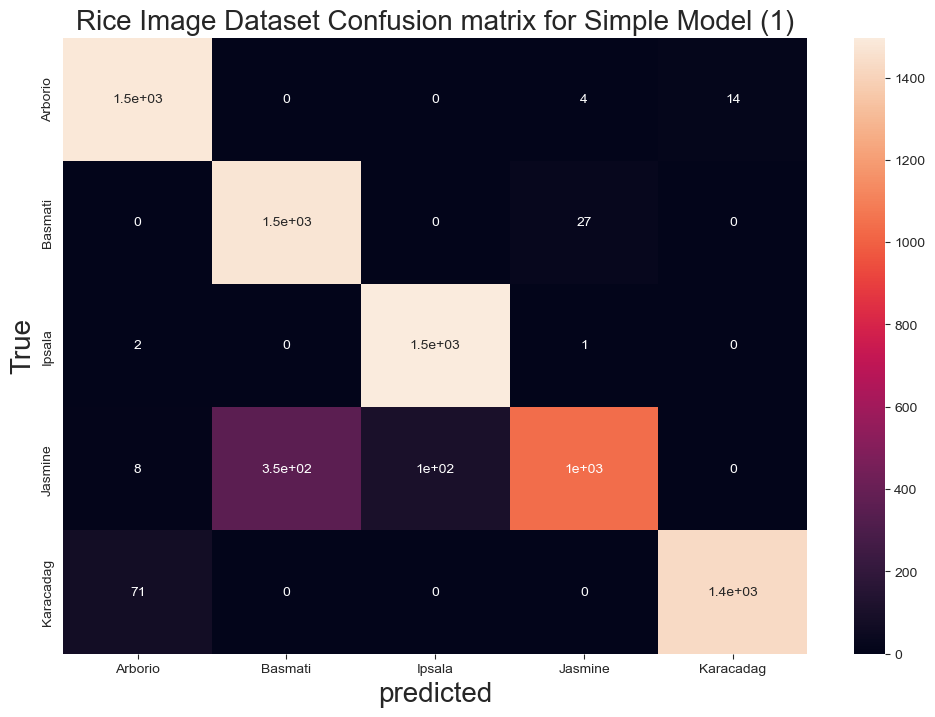

In [21]:
fig = plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax = ax)
ax.set_xlabel('predicted',fontsize=20)
ax.xaxis.set_label_position('bottom')
ax.xaxis.set_ticklabels(class_labels,fontsize=10)
ax.xaxis.tick_bottom()
ax.set_ylabel('True',fontsize=20)
ax.yaxis.set_ticklabels(class_labels,fontsize=10)
plt.title('Rice Image Dataset Confusion matrix for Simple Model (1)',fontsize=20)
plt.show()